# How to see if the csv is consistent with root file

First of all we want to see in a easy way how the csv looks like.

In [1]:
!head -2 small10kevts.csv

runNo,evtNo,nJets,nLeptons,nBJets,category,mva,jetPt,jetEta,jetPhi,jetMass,jetMassSoftDrop,jetTau1,jetTau2,jetTau3,triggerBit
273158,228810226,2,0,0,0,0.189198,[ 541.77087402  464.63562012],[-1.27204072 -1.12141407],[ 0.85293347 -2.31530166],[  90.10404968  169.53872681],[  55.78746414  157.27244568],[ 0.10322858  0.32209143],[ 0.07227356  0.10500722],[ 0.06205374  0.08902366],[ True  True  True False False False False False False False]


Import read_csv. We need it later to read the csv file.

In [2]:
from pandas import read_csv

Use read_csv with the csv file that you want to inspect and print out how many columns and rows there are in the file.

In [3]:
filename = 'small10kevts.csv'
data = read_csv(filename)
print(data.shape)

(10000, 16)


Inspect in a different way how the csv is made.

In [4]:
peek=data.head(5)
print (peek)

    runNo      evtNo  nJets  nLeptons  nBJets  category       mva  \
0  273158  228810226      2         0       0         0  0.189198   
1  273158  229307679      2         0       2         1  0.521495   
2  273158  228310605      2         0       1         1  0.156925   
3  273158  229301195      2         0       0         0  0.672768   
4  273158  228701365      2         0       0         0  0.112140   

                           jetPt                     jetEta  \
0  [ 541.77087402  464.63562012]  [-1.27204072 -1.12141407]   
1  [ 517.32470703  496.56582642]  [-0.2537986  -0.87236762]   
2  [ 349.65866089  332.52963257]  [ 1.73221755  1.67374265]   
3  [ 594.96844482  274.63192749]  [ 0.89914244  0.98478043]   
4  [ 459.79718018  370.2250061 ]  [ 1.69145811  1.48902428]   

                      jetPhi                        jetMass  \
0  [ 0.85293347 -2.31530166]  [  90.10404968  169.53872681]   
1  [-0.57428694  2.58487558]  [ 118.85973358  111.77454376]   
2  [-2.57324243  

Print out the type of the columns

In [5]:
types = data.dtypes
print(types)

runNo                int64
evtNo                int64
nJets                int64
nLeptons             int64
nBJets               int64
category             int64
mva                float64
jetPt               object
jetEta              object
jetPhi              object
jetMass             object
jetMassSoftDrop     object
jetTau1             object
jetTau2             object
jetTau3             object
triggerBit          object
dtype: object


Use matplotlib to plot data

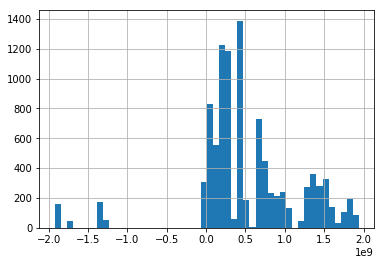

In [17]:
import matplotlib.pyplot as plt
data['evtNo'].hist(bins=50)

Because of inside the csv there are arrays and read_csv import them as strings, I want to see the length of the first record of a branch and which characters are inside.

In [7]:
print "Length of the first record of the branch jetPt -> ", (len(data['jetPt'][0]))
print "Characters inside the string: "
for i in range (0,len(data['jetPt'][0])):
    print (data['jetPt'][0][i])

Length of the first record of the branch jetPt ->  29
Characters inside the string: 
[
 
5
4
1
.
7
7
0
8
7
4
0
2
 
 
4
6
4
.
6
3
5
6
2
0
1
2
]


In [8]:
count=[] # It will contains for each event the array of the numbers inside the selected branch
         # or True/False if the branch contains booleans 
lst=[] # It will contains as items all the characters of a number
print (data['triggerBit'][0]) # Print how a record looks like
start=0 # I have to modify "start" when I start to read the first character
        # of the string different from "prohibited" characters
prohibited=['[',']', " "]
for i in range (0,len(data['triggerBit'][0])):
    if data['triggerBit'][0][i] not in prohibited:
        start=1
        lst.append(data['triggerBit'][0][i])
    elif start == 0:
        continue
    else:
        if lst==[]:
            continue
        count.append(''.join(lst))
        lst=[]
print count # Now the list is maded by single words
count = [int(eval(i)) for i in count] # Convert and then print the list made of numbers now (this line is for booleans)
# count = [float(i) for i in count]   # This line is for numbers (float)
print count

[ True  True  True False False False False False False False]
['True', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False']
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


Import pyROOT to plot data imported from the root file

In [9]:
import ROOT
from ROOT import TCanvas, TH1F

Welcome to JupyROOT 6.12/04


Show the histogram for "triggerBit".

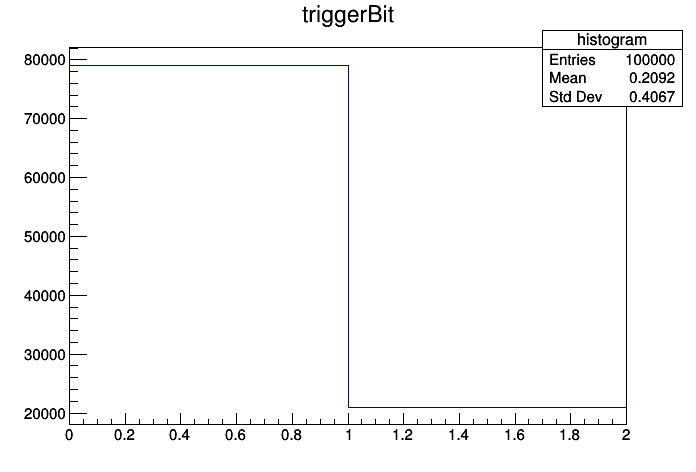

In [10]:
c = TCanvas("c1","c1")
histo=TH1F("histogram","triggerBit", 2, 0, 2)
prohibited=['[',']', " "]
for evts in range (0, len(data['triggerBit'])):
    count=[] # It will contains for each event the array of the numbers inside the selected branch
             # or True/False if the branch contains booleans 
    lst=[] # It will contains as items all the characters of a number
    start=0 # I have to modify "start" when I start to read the first character
            # of the string different from "prohibited" characters
    for i in range (0,len(data['triggerBit'][evts])):
        if data['triggerBit'][evts][i] not in prohibited:
            start=1
            lst.append(data['triggerBit'][evts][i])
        elif start == 0:
            continue
        else:
            if lst==[]:
                continue
            count.append(''.join(lst))
            lst=[]
    count = [int(eval(i)) for i in count] # Convert and then print the list made of numbers now (this line is for booleans)
    #count = [float(i) for i in count]    #This line is for numbers (float)
    for i in range (0, len(count)):
        histo.Fill(count[i])
histo.Draw()
c.Draw()

Show the histogram for jetPt

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


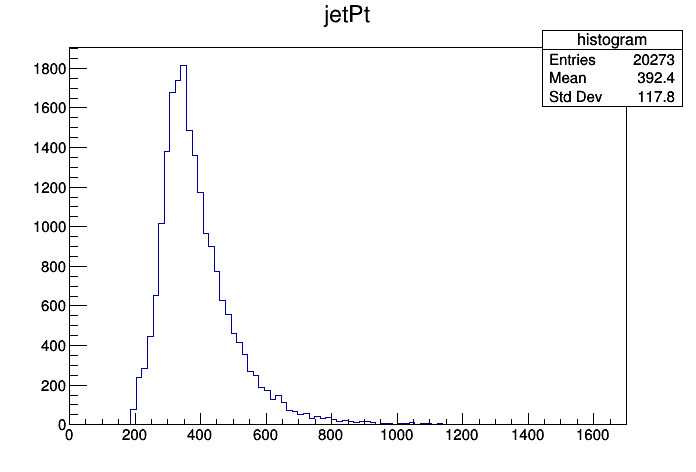

In [11]:
c = TCanvas("c1","c1")
histo=TH1F("histogram","jetPt", 100, 0, 1700)
prohibited=['[',']', " "]
for evts in range (0, len(data['jetPt'])):
    count=[] # It will contains for each event the array of the numbers inside the selected branch
             # or True/False if the branch contains booleans 
    lst=[] # It will contains as items all the characters of a number
    start=0 # I have to modify "start" when I start to read the first character
            # of the string different from "prohibited" characters
    for i in range (0,len(data['jetPt'][evts])):
        if data['jetPt'][evts][i] not in prohibited:
            start=1
            lst.append(data['jetPt'][evts][i])
        elif start == 0:
            continue
        else:
            if lst==[]:
                continue
            count.append(''.join(lst))
            lst=[]
    #count = [int(eval(i)) for i in count] # Convert and then print the list made of numbers now (this line is for booleans)
    count = [float(i) for i in count]   # This line is for numbers (float)
    for i in range (0, len(count)):
        histo.Fill(count[i])
histo.Draw()
c.Draw()

Show the histogram of "evtNo" and we can see that is similar to the same one done with matplotlib.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


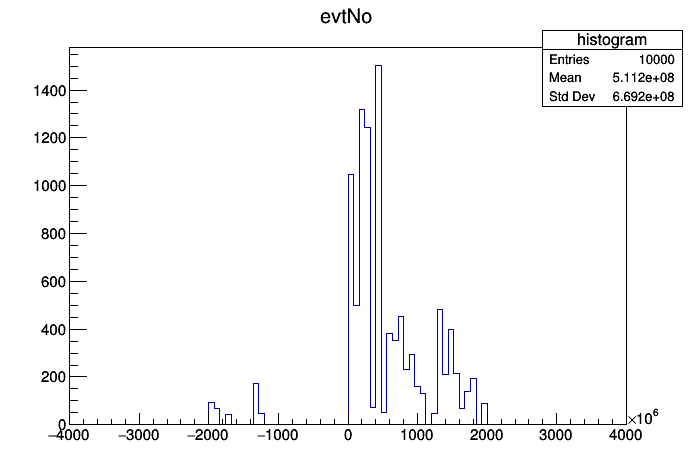

In [12]:
c = TCanvas("c1","c1")
histo=TH1F("histogram","evtNo", 100, -4e+09, 4e09)
for index, row in data.iterrows():
    histo.Fill(row[1])
histo.Draw()
c.Draw()

Load the root file using pyROOT. We want to see that the histograms produced using te csv data and the ROOT file are the same.

In [13]:
f = ROOT.TFile("small10kevts.root")
t=f.Get("events")

Plot "jetPt", "evtNo" and "nJets" as examples.

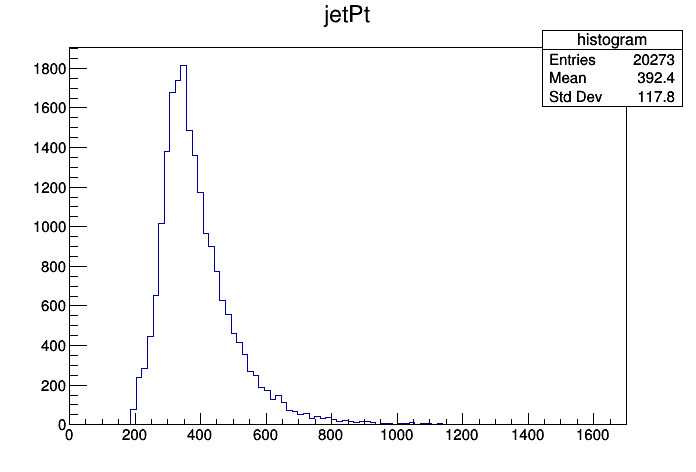

In [14]:
d = ROOT.TCanvas("myCanvasName","The Canvas Title",700,500)
prova=TH1F("histogram","jetPt", 100, 0, 1700)
for ientry in t:
    for i in range(0,len(t.jetPt)):
        prova.Fill(t.jetPt[i])
prova.Draw()
d.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Warning in <TFile::Append>: Replacing existing TH1: histogram (Potential memory leak).


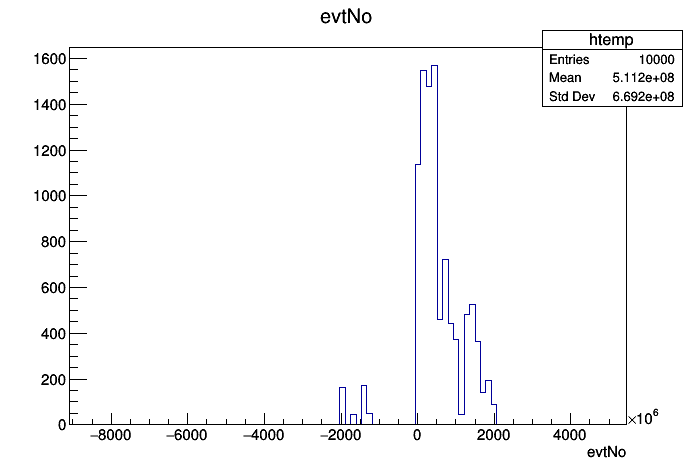

In [15]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",700,500)
prova=TH1F("histogram","evtNo", 100, -4000e+06, 4000e+06)
t.Draw("evtNo")
#t.GetMax("evtNo")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


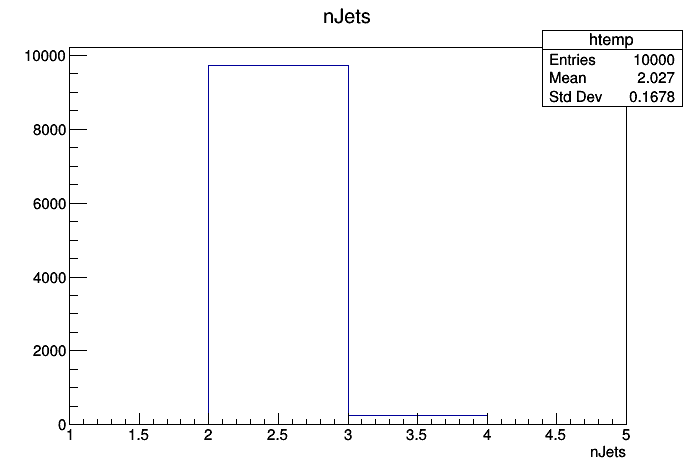

In [16]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",700,500)
t.Draw("nJets")
c.Draw()